## Python Review (Part 1)

### Reading CSV with Pandas

A simple way to store big data sets is to use CSV files (comma separated values).

To load the CSV into a DataFrame, use read_csv() function.

Syntax: `pd.read_csv(filepath, sep=' ,' , header='infer'…)`

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read CSV
df = pd.read_csv('datasets/calories_dirty.csv')
# Display first 5 items
df.head(5)

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0


In [5]:
# Selects a single row at index 1
df.iloc[1]

# Selects multiple rows from index 1 to 4 (5 is exclusive).
df.iloc[1:5]

,Duration,Date,Pulse,Maxpulse,Calories
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0


In [104]:
# Display last 5 items
df.tail(5)

### Cleaning Up Data

Data cleaning means fixing bad data in your data set. Bad data could be any of the following:

- Empty cells: `.dropna(…)` or `.fillna(…)`
- Duplicates: `.drop_duplicates()`
- Data in wrong format
- Wrong data

In [105]:
# Drop cells with empty/missing values
df1 = df.dropna(axis=0)
df1.shape

In [106]:
df["Calories"].fillna(df["Calories"].mean())

In [107]:
# Remove the duplicates
df2 = df1.drop_duplicates()
df2.shape

### Descriptive Statistics

A large number of methods collectively compute descriptive statistics and other related operations on DataFrame.

DataFrame − “index” (axis=0, default), “columns” (axis=1)

Common aggregate functions:

- `count()`
- `sum()` and `prod()`
- `mean()`, `median()`, and `mode()`
- `min()` and `max()`
- `describe()`

In [108]:
df2.describe()

In [109]:
# Mean of Pulse
mean_pulse = df2["Pulse"].mean()
print(mean_pulse)

In [110]:
q3_pulse = df2["Pulse"].quantile(0.75)
q3_pulse

### Filter By Column

`df['column_name'] == some_value` returns a boolean array

`df[ <pass a boolean array to filter> ]`

In [111]:
df['Pulse'] >= q3_pulse

In [112]:
df[df['Pulse'] >= 100]

In [113]:
df2[[True, True, True, False, True, True, True, False, True, True, True, False, True, True, True, False, True, True, True, False, True, True, True, False, True, True, True, False]]

#### Multiple Queries

    (query) & (query)
    (query) | (query)
    ~(query)

NOTE: the (parenthesis) is important!

In [114]:
# Filter greater than 130 but less than 170
df2[(df2["Maxpulse"] >= 130) & (df2["Maxpulse"] <= 170)]

In [115]:
# Cleanup the last problematic column
# Duration should be >= 30 but <= 60
df3 = df2[(df2["Duration"] >= 30) & (df2["Duration"] <= 60)]
df3

### Matplotlib

`.plot(kind=kind)` has several optional parameters:

- "area" is for area plots.
- "bar" is for vertical bar charts.
- "barh" is for horizontal bar charts.
- "box" is for box plots.
- "hexbin" is for hexbin plots.
- "hist" is for histograms.
- "kde" is for kernel density estimate charts.
- "density" is an alias for "kde".
- "line" is for line graphs (the default).
- "pie" is for pie charts.
- "scatter" is for scatter plots.

In [125]:
plt.scatter(df["Pulse"], df["Calories"])
plt.show()

In [ ]:
plt.boxplot(df3["Pulse"], vert=False)
plt.show()

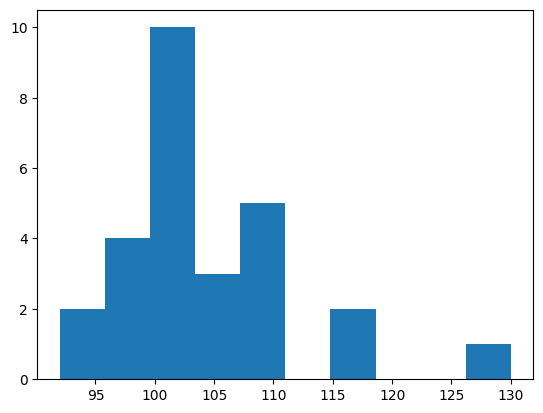

In [126]:
plt.hist(df3["Pulse"])
plt.show()

In [144]:
df4 = pd.read_csv('datasets/employees.csv')
df4

,number,first_name,last_name,gender,birth_date,employment_status,annual_salary
0,483,Lenord,Kihn,M,1994-07-01,Full Time,64598
1,478,Palma,Beahan,F,1972-05-06,Full Time,124103
2,348,Hebert,Muller,M,1990-09-04,Full Time,100324
3,757,Virginia,Ullrich,M,1991-09-23,Full Time,144957
4,937,Roby,Hudson,M,1997-01-15,Full Time,137659
...,...,...,...,...,...,...,...
994,712,Dann,Crooks,M,1983-12-25,Part Time,66592
995,132,Maxim,Orn,M,1971-03-01,Part Time,127966
996,126,Kimberli,Walter,M,1976-03-07,Part Time,60712
997,277,Talmage,Bartell,F,1989-02-19,Full Time,103606


In [150]:
df5 = df4[df4["gender"] == "M"]
df5.shape

(620, 7)

In [151]:
df6 = df4[df4["gender"] == "F"]
df6.shape

(379, 7)

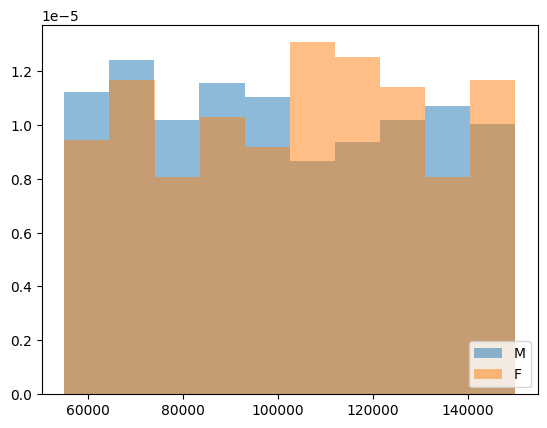

In [154]:
plt.hist(df5["annual_salary"], alpha=0.5, density=True, label="M")
plt.hist(df6["annual_salary"], alpha=0.5, density=True, label="F")
plt.legend(loc='lower right')
plt.show()